In [0]:
import pandas as pd
import numpy as np
import seaborn as sns 

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# loading data
recom_data = pd.read_csv('/content/drive/My Drive/Datasets/ratings_Electronics.csv', names=[ 'userId', 'productId', 'ratings', 'timestamp'])

In [0]:
# checking the shape of the data 
recom_data.shape

(7824482, 4)

In [0]:
# Checking random 10 sample rows
recom_data.sample(10)

,userId,productId,ratings,timestamp
160021,AFCM8OWKTH4XE,B000068MP2,5.0,1175644800
2456350,A7R79JLQ5Q28M,B00272F70C,1.0,1289779200
3045575,A1TAH41703WUDL,B0034CL2ZI,5.0,1357948800
4534820,A22QOW1BBHRRNR,B004WQVTLC,5.0,1363132800
1168504,AXTGHV2XHZWFK,B000MMDHN8,5.0,1265068800
6700949,A3SOY9DXQWO9QW,B009RVYEZ0,1.0,1383609600
663554,A1DQ7VLJCOW3LM,B0009H9PZU,1.0,1130284800
4096489,A23JRN7EYQ7BEE,B004G8QQ6O,5.0,1304035200
2648792,A2HSHQ12I1RDY4,B002JEL40A,1.0,1356220800
5545006,A21MOEBLX7HLG4,B007136D46,4.0,1369180800


In [0]:
# info
recom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


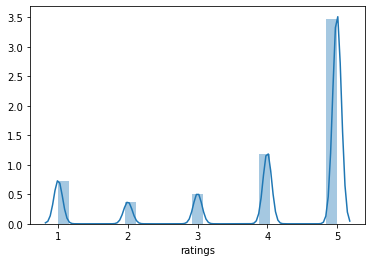

In [0]:
# univariate analysis for ratings
sns.distplot(recom_data['ratings'], bins=25)
# recom_data['ratings'].hist(bins=10)

In [0]:
# No. of unique userId, productId
recom_data.nunique()

userId       4201696
productId     476002
ratings            5
timestamp       5489
dtype: int64

In [0]:
# extract the data for the users who have given ratings to atleast 50 products 
grouped_data = recom_data.groupby('userId').filter(lambda df: df['productId'].nunique() >= 50)
grouped_data

,userId,productId,ratings,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200
...,...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1405641600
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0,1405209600
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,1405296000
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,1405209600


In [0]:
# checking the data for refined result
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 4 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
timestamp    125871 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


In [0]:
# dropping timestamp as it is not required currently.0
grouped_data_no_timestamp = grouped_data.drop('timestamp', axis=1, inplace=False)

In [0]:
# random 8 samples
grouped_data_no_timestamp.sample(8)

,userId,productId,ratings
3168523,AFM7FK7NFEKFZ,B0039C20F4,5.0
6154418,AX05DBU8IRUWY,B008BFJWTQ,4.0
2909564,A1QQA7Y92L4F9R,B002WB2LV6,5.0
7424581,AA91O96C1Z18W,B00DQZQ16S,5.0
1797471,A2JE071UW97J2A,B0018MTJEM,5.0
750554,A5JLAU2ARJ0BO,B000BI2180,1.0
2733825,A3S0DBBR693O06,B002NKM27Y,5.0
1797408,A3NEAETOSXDBOM,B0018MRG5G,5.0


In [0]:
# Checking the shape
grouped_data_no_timestamp.shape

(125871, 3)

In [0]:
# checking the unique entries
grouped_data_no_timestamp.nunique()

userId        1540
productId    48190
ratings          5
dtype: int64

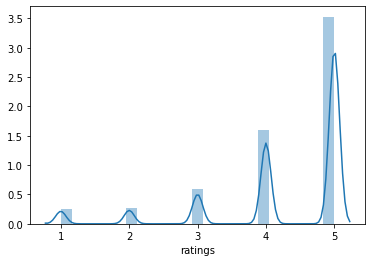

In [0]:
sns.distplot(grouped_data_no_timestamp['ratings'], bins=25)

In [0]:
# checking randomly per user records
grouped_data_no_timestamp[grouped_data_no_timestamp['userId'] == 'A3BY5KCNQZXV5U'].shape

(50, 4)

In [0]:
grouped_data_no_timestamp[grouped_data_no_timestamp['userId'] == 'A1WG97A0EFHYXN'].shape

(72, 3)

In [0]:
grouped_data_no_timestamp[grouped_data_no_timestamp['userId'] == 'A1WG97A0EFHYXN']['ratings'] > 3

103741      True
131807      True
272969      True
366057      True
498487      True
           ...  
7199269    False
7641053     True
7660211     True
7707519     True
7742375     True
Name: ratings, Length: 72, dtype: bool

In [0]:
# grouped_data_no_timestamp.to_csv('file1.csv')

In [0]:
popular_by_mean = grouped_data_no_timestamp.groupby('productId')['ratings'].mean()
popular_by_mean.head()

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [0]:
popular_by_mean.sort_values(ascending=False).head()

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [0]:
popular_by_count = grouped_data_no_timestamp.groupby('productId')['ratings'].count()
popular_by_count.head()

productId
0594451647    1
0594481813    1
0970407998    2
0972683275    4
1400501466    6
Name: ratings, dtype: int64

In [0]:
popular_by_count.sort_values(ascending=False).head()

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [0]:
ratings_mean_count = pd.DataFrame(popular_by_mean)
ratings_mean_count['rating_counts'] = pd.DataFrame(popular_by_count)  

In [0]:
ratings_mean_count.head()

,ratings,rating_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6


In [0]:
# Top 5 popular products 
ratings_mean_count['rating_counts'].sort_values(ascending=False).head()

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: rating_counts, dtype: int64

In [0]:
# Top 5 recommendations based on popularity
ratings_mean_count.sort_values('rating_counts', ascending=False).head()

,ratings,rating_counts
productId,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149


In [0]:
ratings_mean_count["rank"] = ratings_mean_count["rating_counts"].rank(ascending=False) 

In [0]:
ratings_mean_count.sort_values('rank').head()

,ratings,rating_counts,rank
productId,,,
B0088CJT4U,4.218447,206,1.0
B003ES5ZUU,4.864130,184,2.0
B000N99BBC,4.772455,167,3.0
B007WTAJTO,4.701220,164,4.0
B00829TIEK,4.436242,149,5.0


In [0]:
def recommend_popular_product(df, popularity_col, popularity_based_on, number_of_recommendation, type_of_recommendation = True):
    '''
    This method provides the popularity/least popular products
    parameter description:
    df = Dataframe which you want to use.
    popularity_col
    popularity_based_on
    number_of_recommendation = total number of recommendation
    type_of_recommendation: if true, most popular products, else least popular 
    '''
    ratings_sorted = pd.DataFrame(df.groupby(popularity_col)[popularity_based_on].mean())
    ratings_sorted['score'] = pd.DataFrame(df.groupby(popularity_col)[popularity_based_on].count())
    ratings_sorted['rank'] = ratings_sorted['score'].rank(ascending=False)
    return ratings_sorted.sort_values('rank', ascending=type_of_recommendation).head(number_of_recommendation)

In [0]:
# Most popular 5 product
recommend_popular_product(grouped_data_no_timestamp, 'productId', 'ratings', 5)

,ratings,score,rank
productId,,,
B0088CJT4U,4.218447,206,1.0
B003ES5ZUU,4.864130,184,2.0
B000N99BBC,4.772455,167,3.0
B007WTAJTO,4.701220,164,4.0
B00829TIEK,4.436242,149,5.0


In [0]:
# Least popular 5 product
recommend_popular_product(grouped_data_no_timestamp, 'productId', 'ratings', 5, False)

,ratings,score,rank
productId,,,
0594451647,5.0,1,32773.0
B0049XR5MK,5.0,1,32773.0
B004A9DHMK,4.0,1,32773.0
B004AAPKTW,5.0,1,32773.0
B004AAZXQM,4.0,1,32773.0


In [0]:
!pip install surprise

In [0]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader

import collections

In [0]:
reader = Reader(rating_scale=(1, 5))

In [0]:
data = Dataset.load_from_df(grouped_data_no_timestamp,reader)

In [0]:
trainset, testset = train_test_split(data, test_size=.25)

In [0]:
# We'll use SVD algorithm.
algo = SVD()

In [0]:
algo1 = SVD()

In [0]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo1.fit(trainset)


In [0]:
predictions = algo1.test(testset)
predictions

[Prediction(uid='AGGAQLXPVGM5D', iid='B001F0RPGG', r_ui=5.0, est=4.646634353414501, details={'was_impossible': False}),
 Prediction(uid='A3AYSYSLHU26U9', iid='B008OPSWHQ', r_ui=4.0, est=3.6902634041283253, details={'was_impossible': False}),
 Prediction(uid='A6VPK7X53QNAQ', iid='B00CZ7510K', r_ui=4.0, est=4.0749008716414865, details={'was_impossible': False}),
 Prediction(uid='A11KZ906QD08C5', iid='B00009UTLM', r_ui=5.0, est=4.747167354463208, details={'was_impossible': False}),
 Prediction(uid='A2NOIWPJDD7WIQ', iid='B000HGIWN4', r_ui=5.0, est=3.5569213687093537, details={'was_impossible': False}),
 Prediction(uid='A680RUE1FDO8B', iid='B004AX6Z3Y', r_ui=5.0, est=4.383700303281082, details={'was_impossible': False}),
 Prediction(uid='A2NN1KIYEM2SKS', iid='B007VXJ9IS', r_ui=5.0, est=4.425461830601258, details={'was_impossible': False}),
 Prediction(uid='A3EZEP0FX5BC1P', iid='B003YNO0LA', r_ui=3.0, est=3.880835103149819, details={'was_impossible': False}),
 Prediction(uid='A2D0CO1OA6DSWY'

In [0]:
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9812


0.981154878419141

In [0]:
def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [0]:
top_n = get_top_n(predictions, n=5)

In [0]:
top_n

defaultdict(list,
            {'AGGAQLXPVGM5D': [('B009W8YQ6K', 4.7773878179155265),
              ('B007IV7KRU', 4.770592417150763),
              ('B001A4LVYY', 4.719993466928542),
              ('B002PHLZXC', 4.673224933421554),
              ('B00142MUEM', 4.666464267849293)],
             'A3AYSYSLHU26U9': [('B000S5Q9CA', 4.8156200196581525),
              ('B00DTZYHX4', 4.774766139876335),
              ('B00CMJZAOI', 4.76680800304906),
              ('B00BB72WX4', 4.735606857172198),
              ('B00BB6DCUC', 4.719766032216423)],
             'A6VPK7X53QNAQ': [('B000RZQZM0', 4.499940186666313),
              ('B000LRMS66', 4.384716822283076),
              ('B000JV9LUK', 4.357956494845926),
              ('B000T8CWFE', 4.28516664783892),
              ('B001G5ZTN6', 4.213948489148838)],
             'A11KZ906QD08C5': [('B000NP3DJW', 4.995865288000849),
              ('B004GF8TIK', 4.911789925996926),
              ('B001TZWNF0', 4.8807423669182235),
              ('B000P1O73A

In [83]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print("For user: " + uid)
    print( [iid for (iid, _) in user_ratings])
    print()
    if(uid =='A100WO06OQR8BQ' ):
        predicted_list_for_A100WO06OQR8BQ = [iid for (iid, _) in user_ratings]
        

For user: AGGAQLXPVGM5D
['B009W8YQ6K', 'B007IV7KRU', 'B001A4LVYY', 'B002PHLZXC', 'B00142MUEM']

For user: A3AYSYSLHU26U9
['B000S5Q9CA', 'B00DTZYHX4', 'B00CMJZAOI', 'B00BB72WX4', 'B00BB6DCUC']

For user: A6VPK7X53QNAQ
['B000RZQZM0', 'B000LRMS66', 'B000JV9LUK', 'B000T8CWFE', 'B001G5ZTN6']

For user: A11KZ906QD08C5
['B000NP3DJW', 'B004GF8TIK', 'B001TZWNF0', 'B000P1O73A', 'B00IVFDZBC']

For user: A2NOIWPJDD7WIQ
['B007XGLC9C', 'B000EN0K94', 'B006OBGEHW', 'B0064SBNQM', 'B000HAOVGM']

For user: A680RUE1FDO8B
['B00EVWS1JK', 'B00GY0UFFA', 'B00HVT27B8', 'B0016BVKAQ', 'B00BQ5KHJW']

For user: A2NN1KIYEM2SKS
['B007WTAJTO', 'B0013441J8', 'B0058TUZT4', 'B007VXJ9IS', 'B000Q8UAWY']

For user: A3EZEP0FX5BC1P
['B00FJRS5BA', 'B00BOHNYU6', 'B000HDJT4S', 'B004SGJCCO', 'B008VMT2HQ']

For user: A2D0CO1OA6DSWY
['B002WE6D44', 'B001K9BFB8', 'B003I4FHNA', 'B00020S7XK', 'B009IKCE5C']

For user: A3LWC833HQIG7J
['B003ES5ZUU', 'B0019EHU8G', 'B006ZBWV0K', 'B008C1JC4O', 'B005J5TZQ6']

For user: A2HKUM9OEBQKDW
['B000QZ

In [79]:
trainset.to_inner_uid('A100WO06OQR8BQ')

113

In [0]:
rated_products_for_A100WO06OQR8BQ = []
for (uid, iid, rating) in trainset.all_ratings():
    if(uid==1538):
        # print(trainset.to_raw_iid(iid))
        rated_products_for_A100WO06OQR8BQ.append(trainset.to_raw_iid(iid) )

In [81]:
rated_products_for_A100WO06OQR8BQ

['B0012XAUV8',
 'B000089GN2',
 'B0068ZWZY0',
 'B00HSUMSIM',
 'B0081FLFQE',
 'B00AAU54TW',
 'B009VXUFLG',
 'B004I43F9C',
 'B000227PCC',
 'B00004ZCJE',
 'B000NVLQ72',
 'B0040QMB8O',
 'B00004Z6XS',
 'B001F51G16',
 'B003L780XS',
 'B00651CG8C',
 'B00B7X2OW6',
 'B0048FBG06',
 'B00GO8NOU0',
 'B000JO1IPI',
 'B00BE6C692',
 'B000BKN2Y0',
 'B00572M3MY',
 'B00BOHNYU6',
 'B008FH1R0M',
 'B007XGLC9C',
 'B00JY4QCJQ',
 'B001V9LPT4',
 'B0002XQI2E',
 'B00ATZJ60Q',
 'B000BKJZ9Q',
 'B009VV56TY',
 'B00IL7B2YM',
 'B0002Y5WXO',
 'B00JEU3ZA4',
 'B00HSGFPC2',
 'B005ARQV6U',
 'B00634PLTW',
 'B005S0BYQ6',
 'B000N50S3Q',
 'B008F4NL04',
 'B00005RKSK',
 'B004XNLR16',
 'B000EBPCT4']

In [84]:
# lets check wheather it is correct or not
# For user: A12ANFNOSMW5VD
# ['B005JN9310', 'B0034CL2ZI', 'B000CCXCYC', 'B004LTEUDO', 'B002CMUSCE']
predicted_list_for_A100WO06OQR8BQ #= ['B005JN9310', 'B0034CL2ZI', 'B000CCXCYC', 'B004LTEUDO', 'B002CMUSCE']
# rated_products_for_A12ANFNOSMW5VD = grouped_data_no_timestamp[grouped_data_no_timestamp['userId'] == 'A3KTWUXXB8KKC7']['productId'].values

['B002VPE1X4', 'B00AJHDZSI', 'B003ES5ZUU', 'B00CGYCOR0', 'B0002LEMWE']

In [0]:
# rated_products_for_A3KTWUXXB8KKC7

In [85]:
any(item in predicted_list_for_A12ANFNOSMW5VD for item in rated_products_for_A12ANFNOSMW5VD)

False

In [0]:
def list_contains(List1, List2): 
    check = False
  
    # Iterate in the 1st list 
    for m in List1: 
  
        # Iterate in the 2nd list 
        for n in List2: 
    
            # if there is a match
            if m == n: 
                check = True
                print(m)
                return check  
                  
    return check

In [86]:
list_contains(predicted_list_for_A12ANFNOSMW5VD, rated_products_for_A12ANFNOSMW5VD)

False

In [0]:
# predicted correctly for the user

In [0]:
# now using the crossvalidation from surprise

In [0]:
from surprise.model_selection import cross_validate

In [0]:
# suprise cross validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9818  0.9761  0.9811  0.9913  0.9879  0.9836  0.0054  
MAE (testset)     0.7283  0.7221  0.7267  0.7300  0.7289  0.7272  0.0028  
Fit time          7.60    7.63    7.47    7.56    7.53    7.56    0.05    
Test time         0.21    0.21    0.21    0.21    0.21    0.21    0.00    


{'fit_time': (7.597098112106323,
  7.625542163848877,
  7.47028923034668,
  7.55638313293457,
  7.5281736850738525),
 'test_mae': array([0.72825146, 0.7221356 , 0.72668503, 0.73003952, 0.7289362 ]),
 'test_rmse': array([0.98177394, 0.97605797, 0.98112438, 0.99131128, 0.98793195]),
 'test_time': (0.2117784023284912,
  0.2110285758972168,
  0.21074295043945312,
  0.21464228630065918,
  0.20636653900146484)}

In [0]:
# I'm not fully convinced with suprise
# Going for normal method
# please suggest going correct or not

In [67]:
ratings_matrix = grouped_data_no_timestamp.pivot(index="userId",columns="productId",values="ratings").fillna(0) 
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head(5)

(1540, 48190)


productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,...,B00KSTODWY,B00KT17TZ4,B00KTIYN7O,B00KU4RD4M,B00KV6FFN0,B00KVLY8E2,B00KVNY2KA,B00KW2W6B2,B00KW3OFG0,B00KWHMR6G,B00KWL62QI,B00KWMNDDM,B00KWPRSJY,B00KWWY1PQ,B00KXAFYZS,B00KXMN08E,B00KXUHX9S,B00KYA7CT8,B00KYMCJF8,B00L0YFJHY,B00L1I727Y,B00L1I80K2,B00L1NZTSS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from scipy.sparse.linalg import svds

R = ratings_matrix.values
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(R_demeaned, k = 50)
print("U",U.shape)

# since we need only the diagnal matrix
sigma = np.diag(sigma)
print("Sigma",sigma.shape)
print("Vt", Vt.shape)
all_user_predicted_ratings = np.dot(np.dot(U,sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns,index = ratings_matrix.index)
preds['userId'] = preds.index
preds.head()

U (1540, 50)
Sigma (50, 50)
Vt (50, 48190)


productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,...,B00KT17TZ4,B00KTIYN7O,B00KU4RD4M,B00KV6FFN0,B00KVLY8E2,B00KVNY2KA,B00KW2W6B2,B00KW3OFG0,B00KWHMR6G,B00KWL62QI,B00KWMNDDM,B00KWPRSJY,B00KWWY1PQ,B00KXAFYZS,B00KXMN08E,B00KXUHX9S,B00KYA7CT8,B00KYMCJF8,B00L0YFJHY,B00L1I727Y,B00L1I80K2,B00L1NZTSS,B00L21HC7A,B00L2442H0,B00L26YDA4,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,userId
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.007524,0.004419,0.005473,-0.039384,0.010730,0.009077,0.022783,0.002610,0.020192,0.007894,0.003445,0.011198,0.002542,0.001294,-0.000975,0.005769,0.020862,0.006324,-0.005752,-0.054101,0.009353,-0.002904,0.006887,0.006863,0.032798,0.002221,0.019033,0.002383,0.023290,-0.003381,0.001431,0.013529,0.003501,0.005519,0.005930,0.007308,0.012055,0.002931,0.004158,0.006261,...,-0.002720,0.020387,0.027308,0.002093,0.080050,0.301825,0.025514,0.054026,0.001180,0.305221,-0.032002,0.005216,0.032134,0.210341,0.025146,0.001203,-0.012422,0.191196,0.080050,-0.112893,0.032248,0.009111,0.378790,0.157903,0.200243,-0.089795,0.213702,0.016227,-0.059453,0.002137,-0.056550,0.003601,-0.121466,0.031460,0.018503,0.005042,-0.175003,0.010368,-0.012422,A100UD67AHFODS
A100WO06OQR8BQ,0.002017,-0.011281,-0.000990,0.130663,0.006675,-0.003692,0.063175,-0.001179,0.015445,-0.002837,0.022209,0.004486,0.007179,0.000784,0.004880,-0.003642,-0.012857,-0.007970,0.010396,-0.003665,-0.008790,0.008186,-0.002756,-0.018233,0.000540,-0.000595,0.004384,-0.002138,0.014173,-0.015900,0.002969,-0.003831,-0.001833,0.000338,-0.001841,-0.000319,0.007729,0.000133,0.029379,0.007849,...,0.070932,0.100012,-0.052679,-0.000287,-0.037690,-0.016059,0.011835,-0.090337,0.011595,-0.001390,0.003432,0.034635,-0.067900,0.108971,-0.024076,-0.001438,0.037576,-0.087890,-0.037690,0.045833,0.023783,0.008066,-0.015405,-0.012509,-0.011592,0.036588,-0.185869,-0.028652,0.059681,-0.000600,0.010842,0.001158,0.023724,-0.042345,0.003810,0.001879,-0.025018,-0.013943,0.037576,A100WO06OQR8BQ
A105S56ODHGJEK,-0.002300,-0.003010,-0.007833,0.006770,0.005038,-0.004635,-0.004043,0.006798,-0.005971,-0.003314,0.004231,-0.001116,-0.051596,-0.000353,-0.002059,-0.001842,-0.009846,-0.003002,0.012779,0.030134,-0.005173,-0.005352,-0.005577,-0.049105,0.011159,-0.000101,-0.005545,-0.002025,-0.016727,0.004205,-0.001103,-0.002428,-0.000486,-0.001459,-0.002046,0.000049,-0.007272,0.000252,-0.002424,-0.004175,...,-0.019634,-0.005006,0.074821,-0.000362,-0.042817,0.035255,0.011111,0.073949,0.006832,0.011181,0.114515,-0.012905,-0.053463,-0.042304,0.011096,-0.000278,0.007936,0.103369,-0.042817,-0.030375,0.070414,0.029606,-0.130953,-0.008600,-0.017708,-0.024392,-0.179839,0.021375,-0.013053,-0.002011,-0.051062,-0.000178,-0.053547,0.016715,-0.005317,-0.002765,0.086945,-0.110751,0.007936,A105S56ODHGJEK
A105TOJ6LTVMBG,0.003496,0.012581,-0.004962,-0.011772,0.001164,0.003484,-0.004064,-0.000244,0.005212,0.002996,0.004696,0.007012,-0.005361,0.010582,0.003855,0.004258,0.012984,0.009181,-0.000567,-0.005537,0.010110,0.005764,0.007573,-0.031334,0.000644,0.001470,0.011895,0.001287,0.033391,-0.001747,0.001594,0.011036,0.002326,0.002848,0.003426,0.002356,0.000408,0.001481,0.003249,0.008256,...,0.028111,-0.026186,-0.038244,0.001967,-0.010351,-0.020180,-0.000824,0.053712,-0.001578,-0.036481,-0.034386,0.005435,0.012603,0.081222,-0.014255,0.000978,-0.025048,-0.037599,-0.010351,-0.032724,-0.030486,0.008842,0.123102,0.041022,0.124687,-0.025817,-0.120459,0.002877,-0.002602,0.001953,-0.0

In [71]:
preds['userId'] = preds['userId'].astype('str')

preds.dtypes

productId
0594451647    float64
0594481813    float64
0970407998    float64
0972683275    float64
1400501466    float64
               ...   
B00LGN7Y3G    float64
B00LGQ6HL8    float64
B00LI4ZZO8    float64
B00LKG1MC8    float64
userId         object
Length: 48191, dtype: object

In [0]:
user = 'A100WO06OQR8BQ'

In [0]:
user_row = 2


In [89]:
pred_df = preds[preds['userId'] == str(user)].transpose()
pred_df

userId,A100WO06OQR8BQ
productId,
0594451647,0.00201714
0594481813,-0.0112808
0970407998,-0.000990376
0972683275,0.130663
1400501466,0.006675
...,...
B00LGN7Y3G,0.00187922
B00LGQ6HL8,-0.0250184
B00LI4ZZO8,-0.0139428


In [93]:
pred_df = pred_df[:-1].sort_values('A100WO06OQR8BQ', ascending=False)
pred_df.head(5)

userId,A100WO06OQR8BQ
productId,
B0088CJT4U,3.30533
B008DWCRQW,1.91629
B000N99BBC,1.8288
B002SZEOLG,1.45134
B002R5AM7C,1.35947
